In [1]:
# Specify inline plots for notebook
%matplotlib inline
from matplotlib.font_manager import FontProperties

# Libraries -- overkill for the time being
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime
from matplotlib.backends.backend_pdf import PdfPages

gcolour=[0.9,0.5, 0.0];
ngcolour=[0.9, 0.6, 0.0];
scolour=[0.6, 0.2, 0];
jcolour=[0.25, 1.0, 0.0];
pjcolour=[0.0, 0.5, 0.0];
pjgcolour=[0.2, 0.5, 0.0];
pcolour=[0.5, 0.5, 1.0];
mcolour=[0.0, 0.0, 0.6];
siteColors = [mcolour, pcolour, pjcolour, jcolour, scolour, gcolour]

# Set working dir
wrkDir = 'C:/Research/AGU_2015/'
# Set Amflux data dir
amfluxDir = 'C:/Research/Ameriflux/'
MODIS = pd.read_csv(wrkDir + 'allMODIS.csv')
MODISEVI = pd.read_csv(wrkDir + 'allMODISEVI.csv')

In [2]:
MODIS.index = pd.to_datetime(MODIS['Unnamed: 0'])
MODIS_Monthly = MODIS.groupby([MODIS.index.year, MODIS.index.month]).mean().reset_index()
MODIS_Monthly.columns = ['Year','Month','Mpj','Seg','Ses','Vcm','Vcp','Wjs']

MODISEVI.index = pd.to_datetime(MODISEVI['Unnamed: 0'])
MODISEVI_Monthly = MODISEVI.groupby([MODISEVI.index.year, MODISEVI.index.month]).mean().reset_index()
MODISEVI_Monthly.columns = ['Year','Month','Mpj','Seg','Ses','Vcm','Vcp','Wjs']

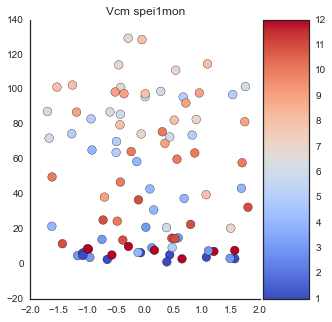

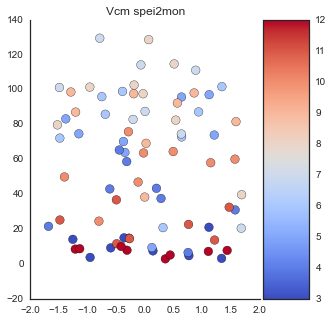

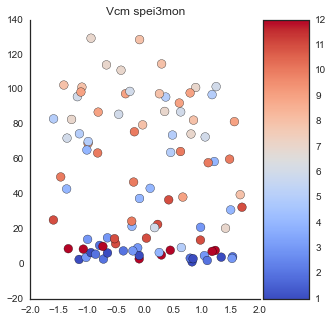

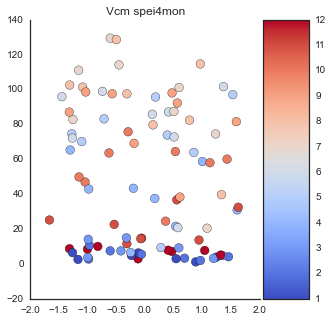

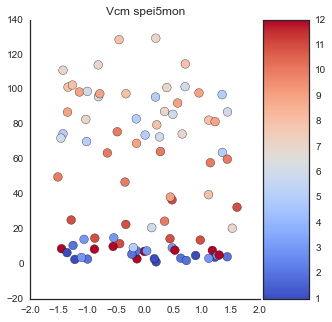

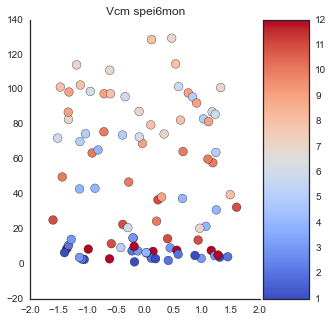

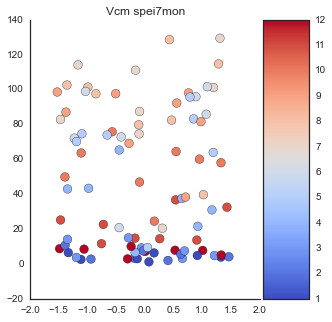

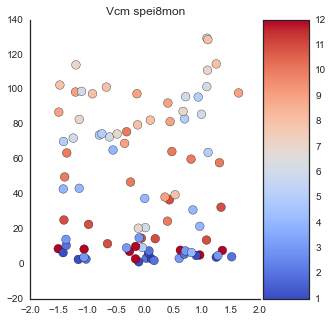

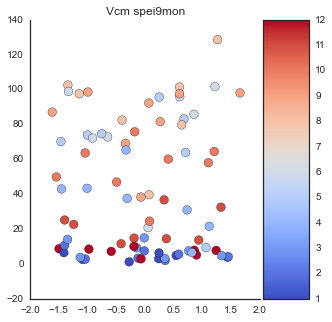

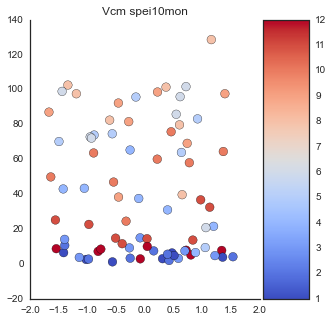

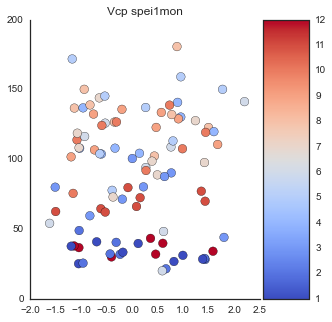

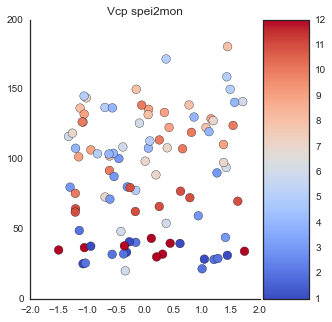

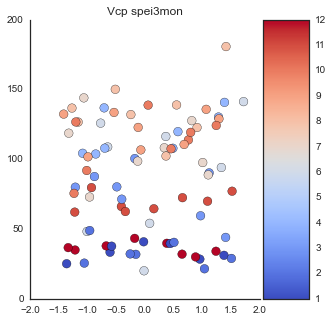

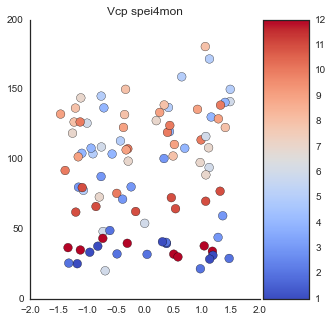

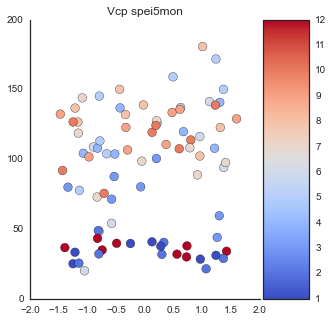

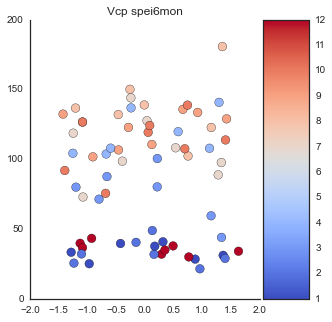

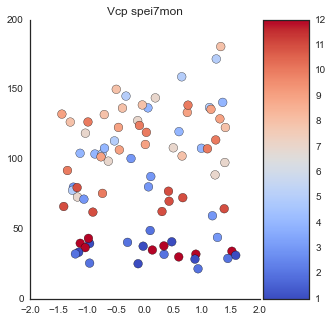

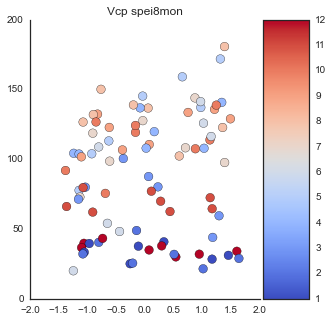

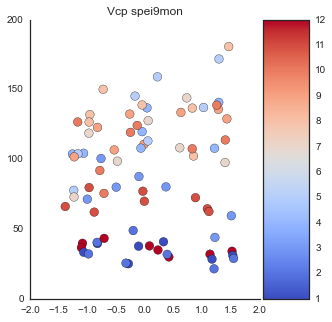

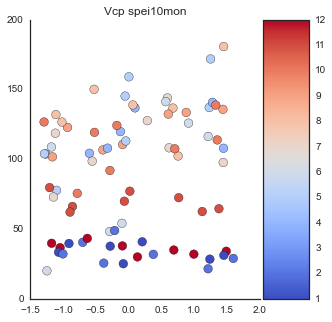

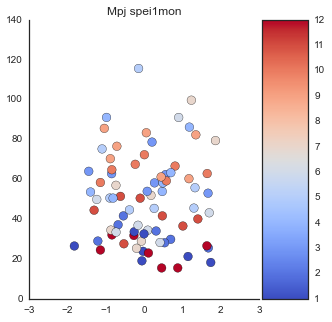

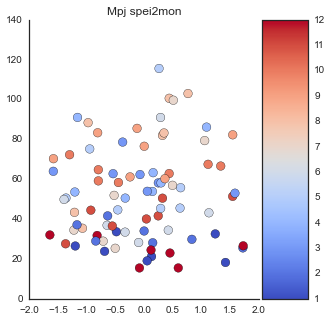

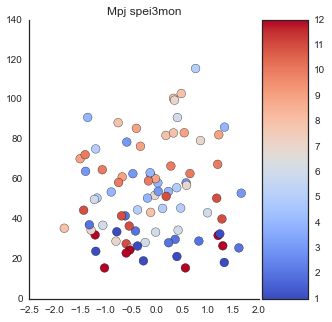

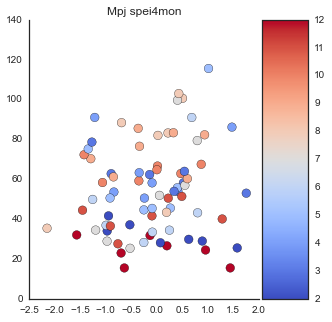

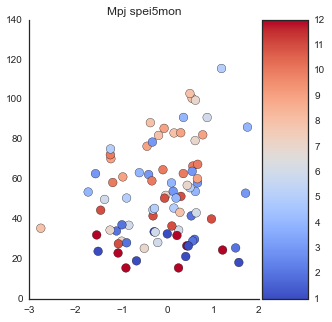

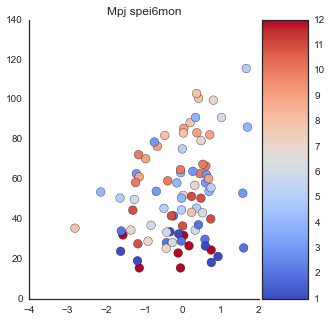

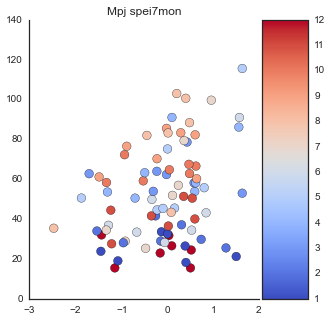

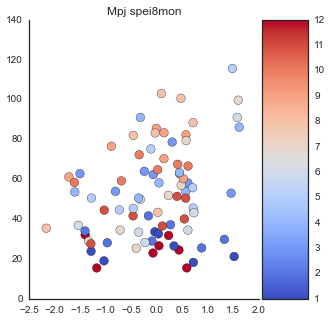

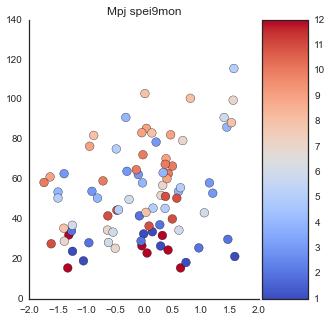

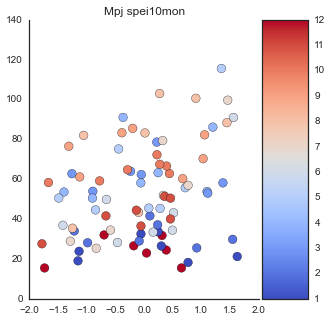

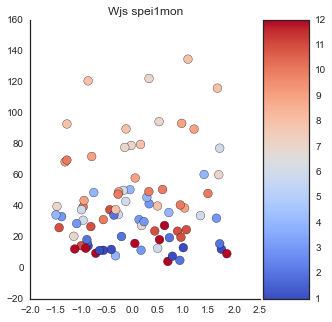

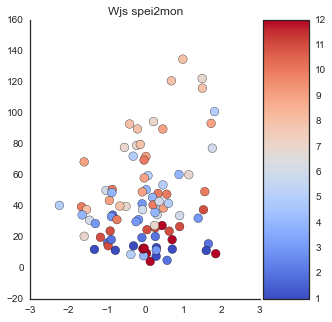

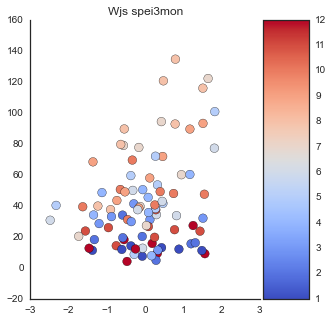

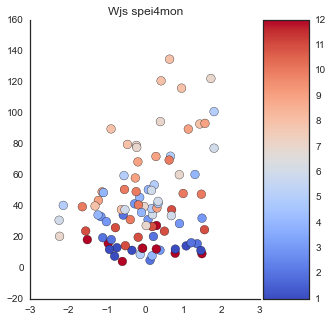

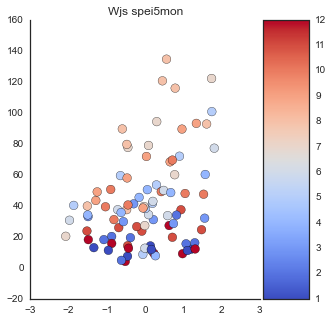

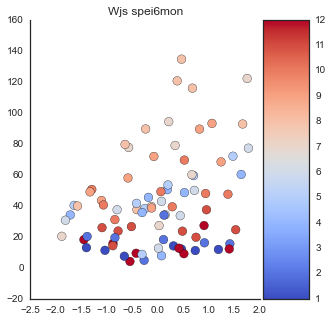

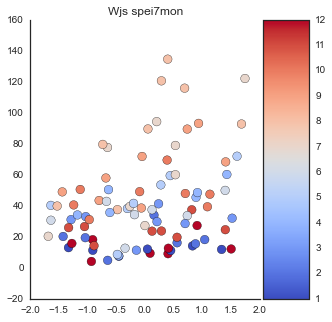

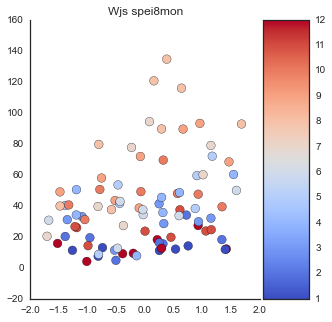

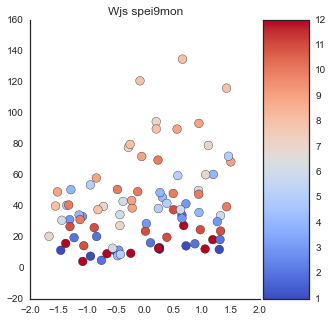

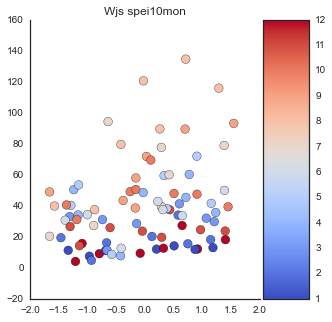

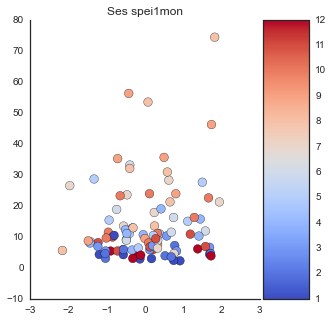

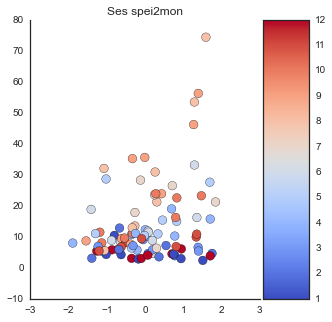

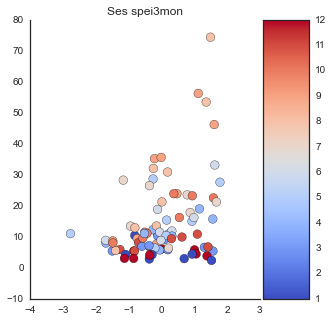

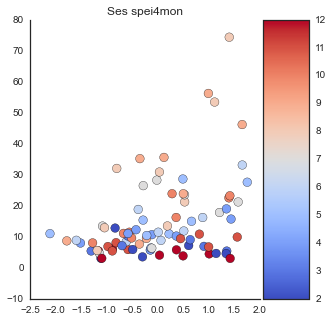

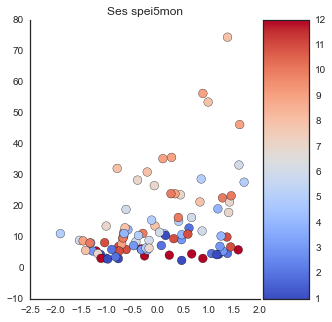

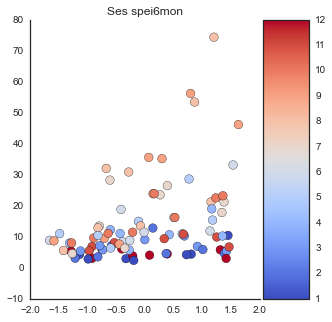

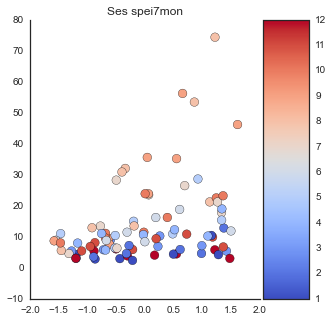

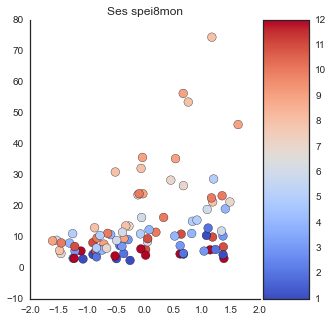

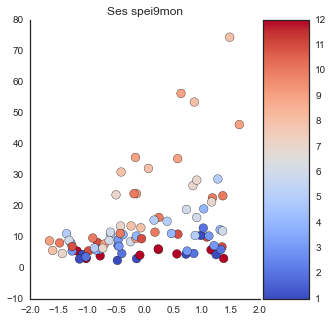

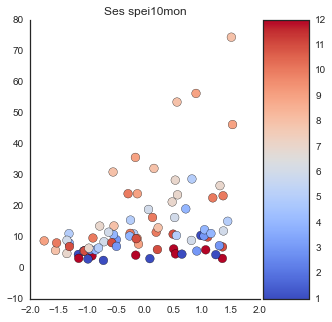

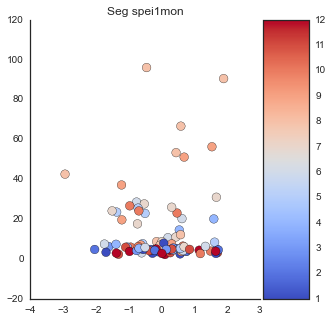

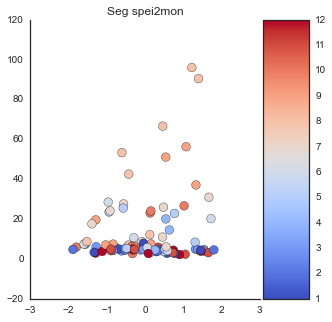

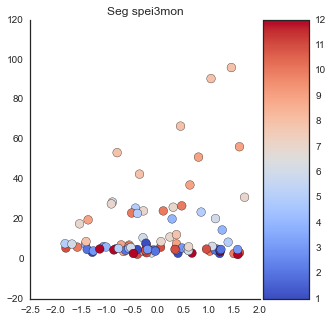

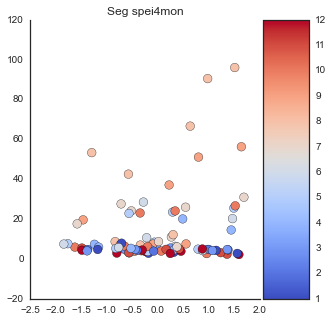

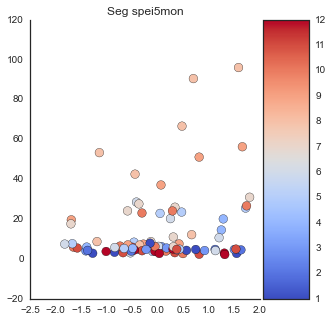

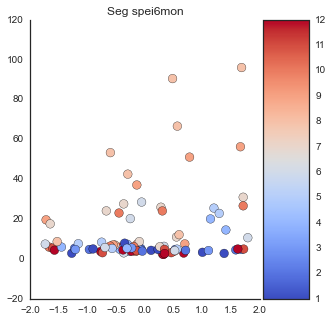

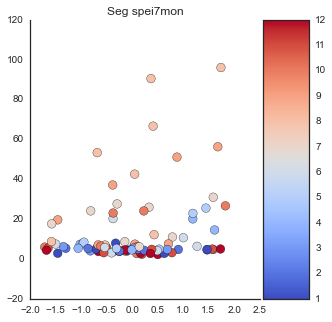

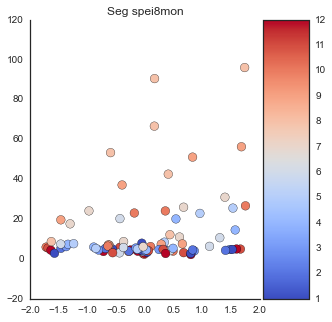

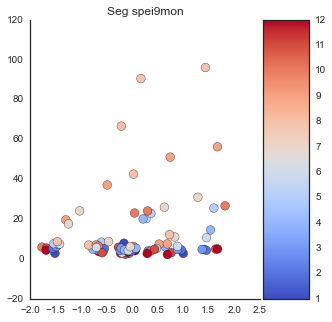

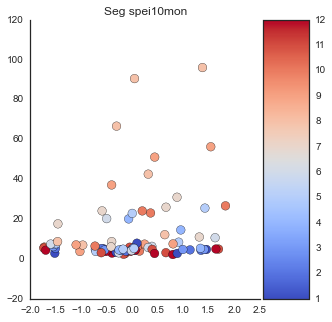

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
jet=plt.get_cmap('coolwarm')
sites = ['Vcm','Vcp','Mpj','Wjs','Ses','Seg']
pp = PdfPages('GPPxSPEI.pdf')
idx = 0
for site in sites:
    data = pd.read_csv(wrkDir + 'monthly_spei_flux_' + site + '.csv')
    cnames = data.columns.values 
    cnames[0] = 'Time'
    data.columns = cnames
    data.index = pd.to_datetime(data['Time'])
    toAppend = MODIS_Monthly[MODIS_Monthly.Year > 2006]
    toAppend = toAppend[toAppend.Year < 2015]
    data = data[data.index.year < 2015]
    sitendvi = pd.DataFrame(dict(NDVI = toAppend[site]))
    sitendvi.index = data.index
    data['ndvi'] = sitendvi
    mons = np.arange(1,11,1)
    for mon in mons:
        spei = 'spei' + str(mon) + 'mon'
        fig, (ax) = plt.subplots(1,1, figsize=(5,5))
        divider = make_axes_locatable(ax)
        pcx = ax.scatter(data[spei].ravel(), data.GPP_g_int.ravel(), 
                   cmap = jet, c = data.index.month, s = 75)
        sns.set_style('white')
        ax.set_title(site + ' ' + spei)
        sns.despine()
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar3 = plt.colorbar(pcx, cax=cax, ticks=MultipleLocator(1))
        plt.show()
        pp.savefig(fig)
        plt.close();
    idx = idx + 1
pp.close()


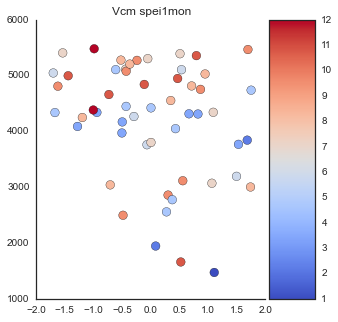

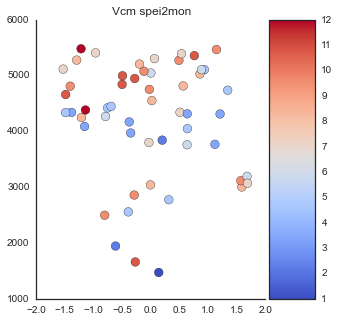

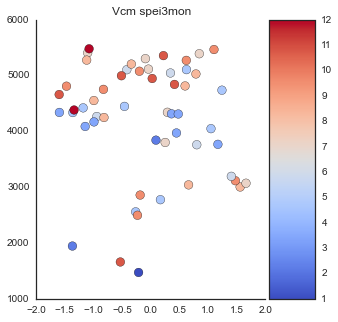

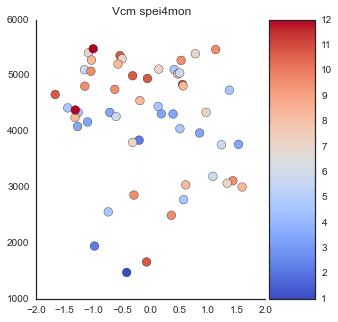

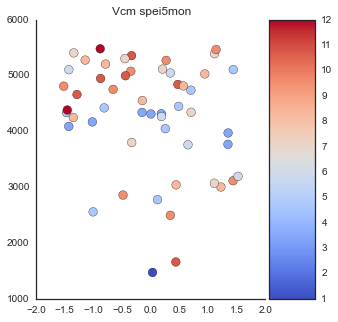

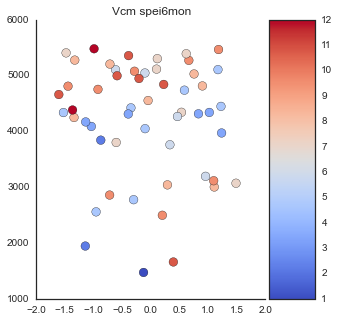

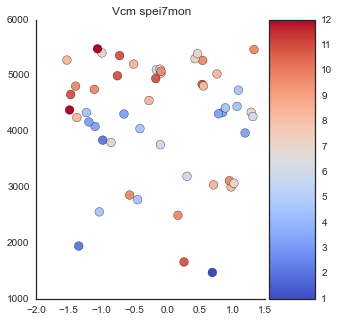

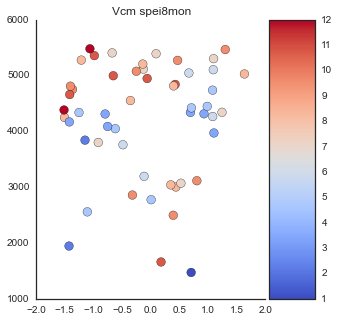

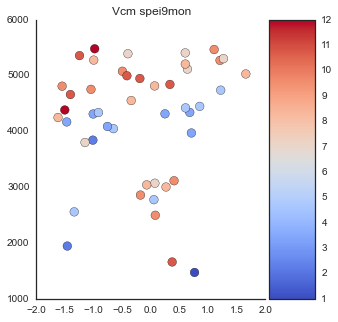

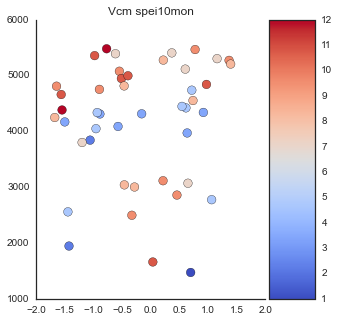

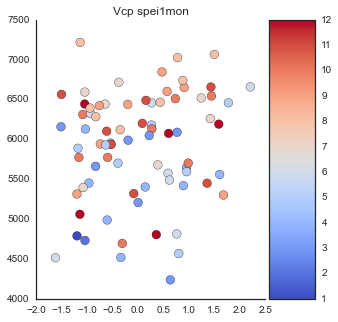

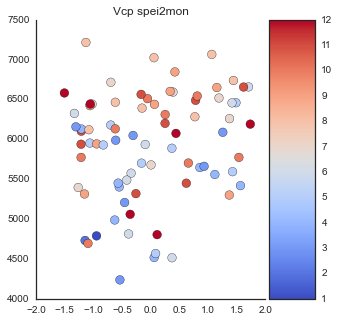

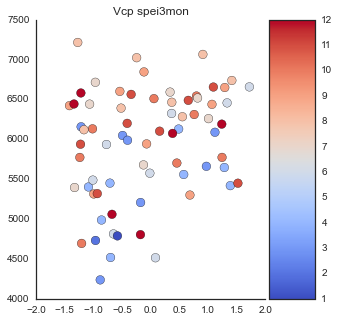

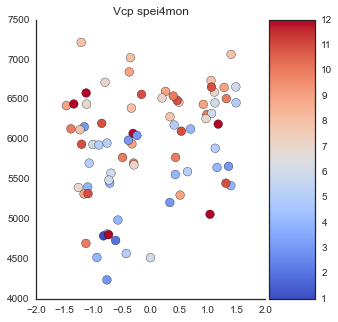

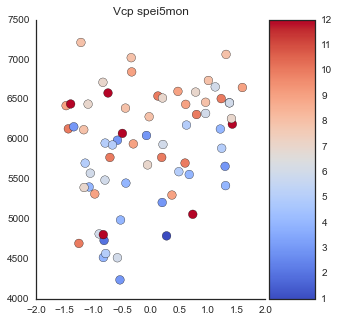

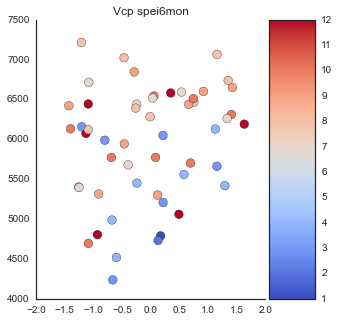

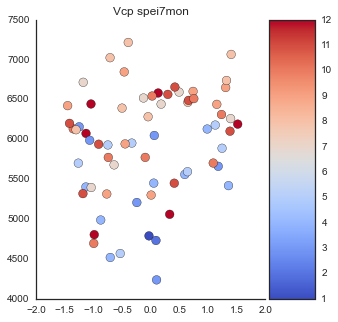

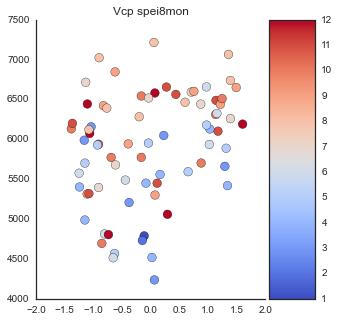

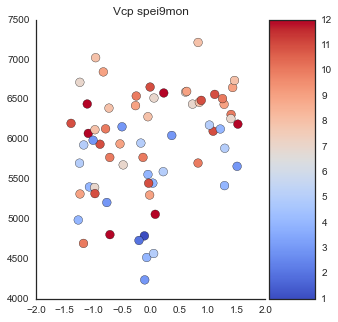

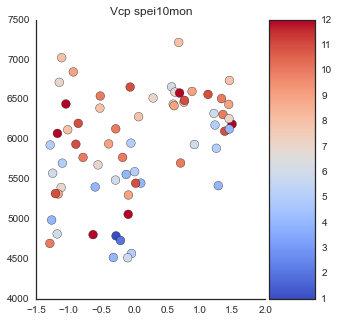

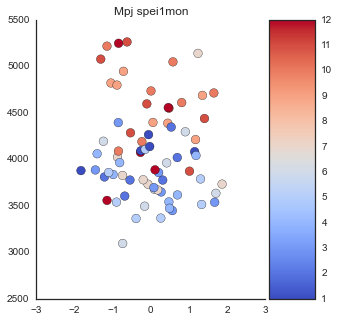

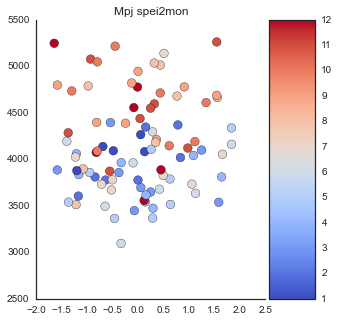

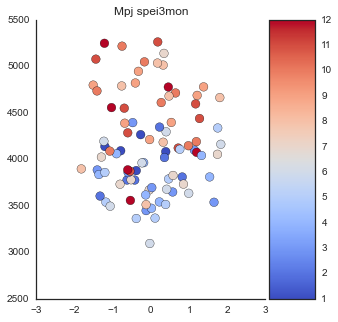

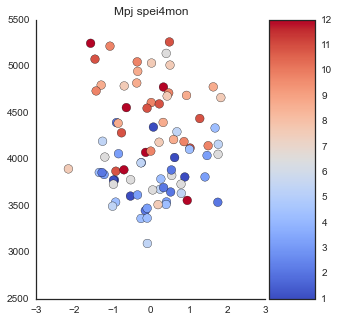

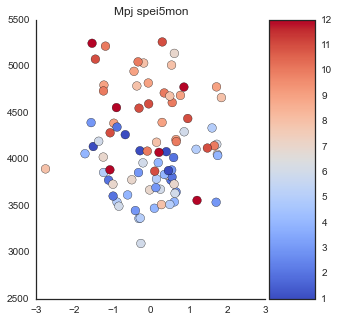

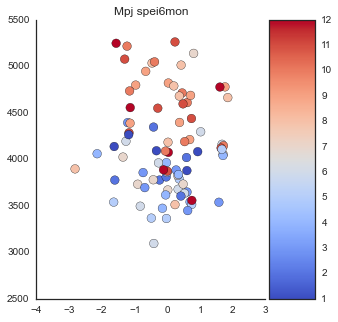

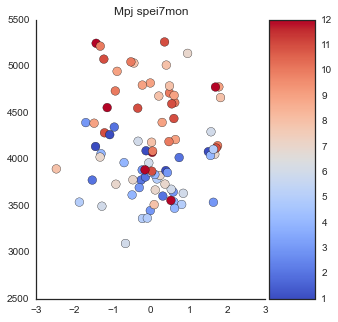

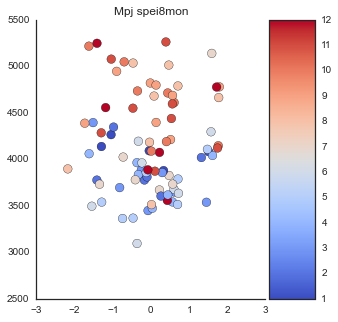

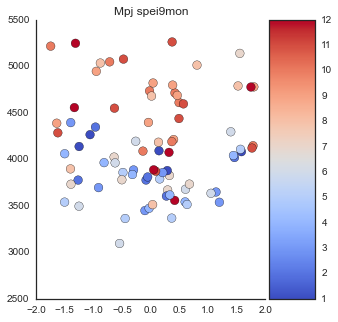

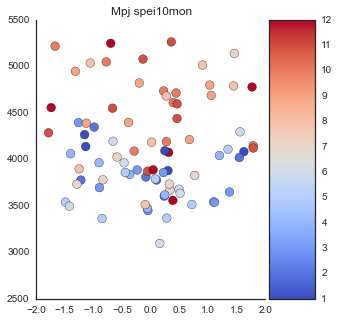

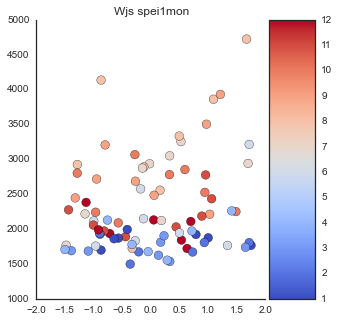

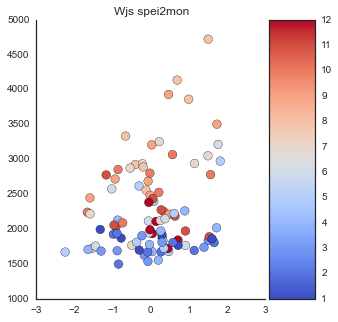

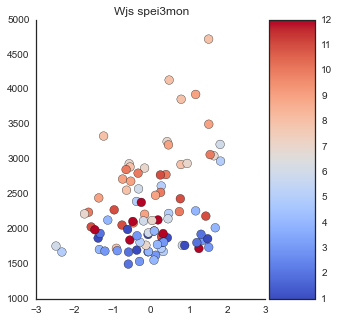

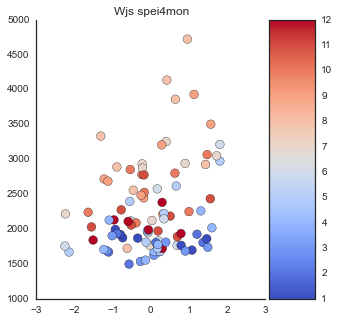

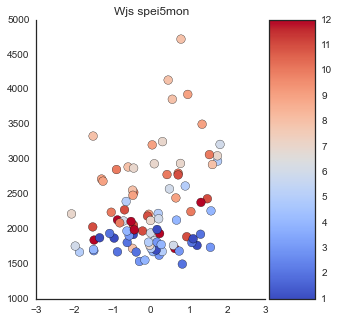

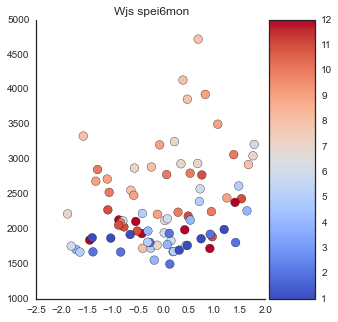

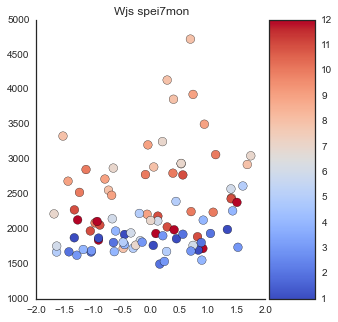

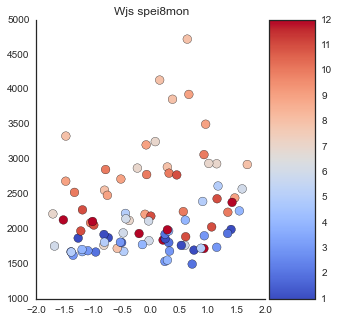

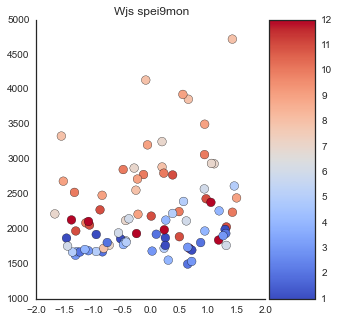

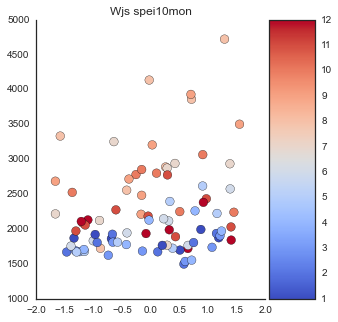

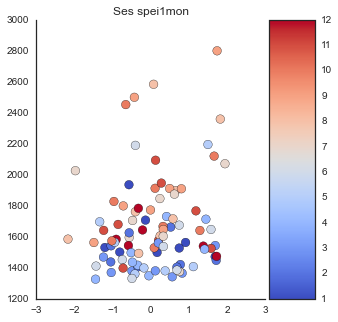

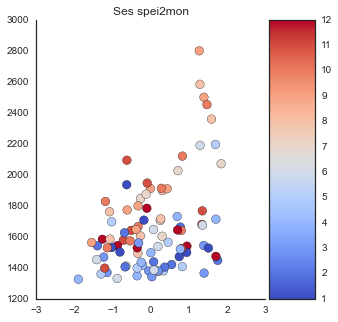

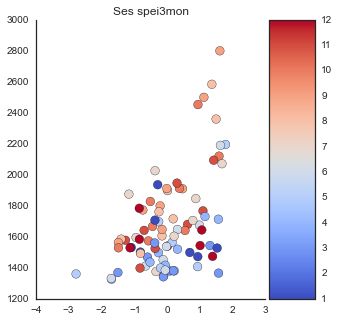

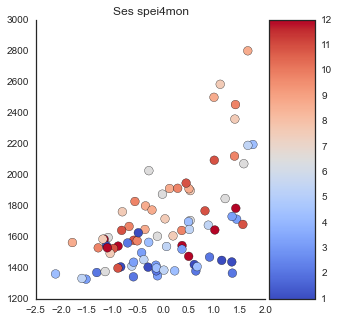

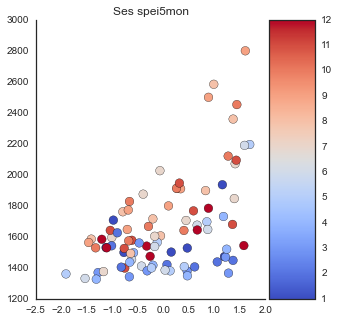

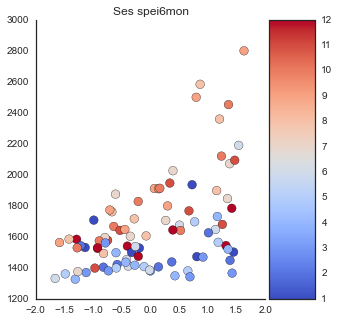

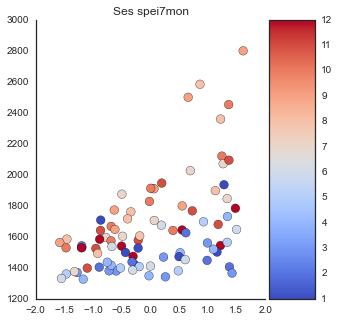

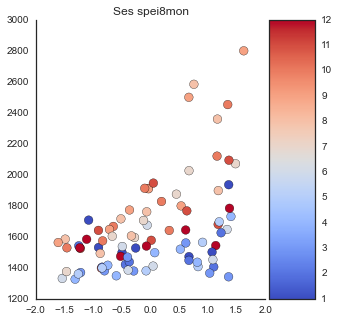

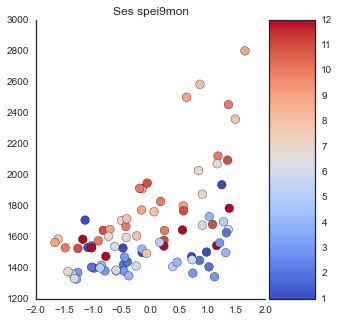

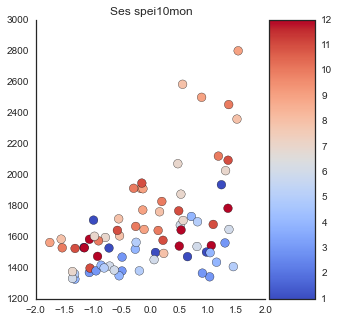

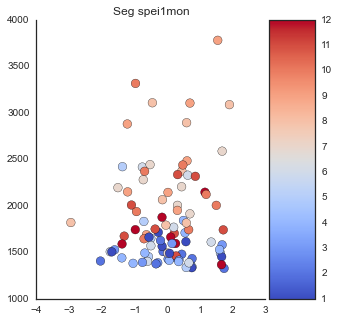

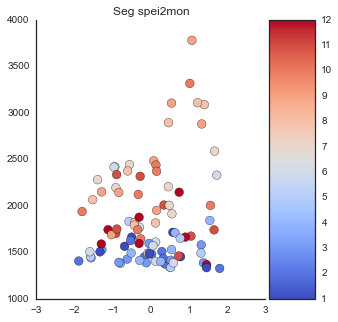

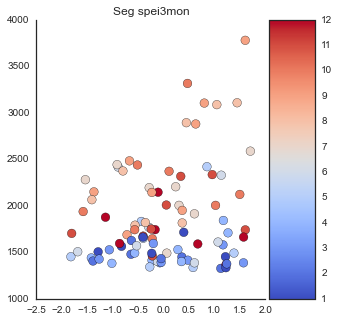

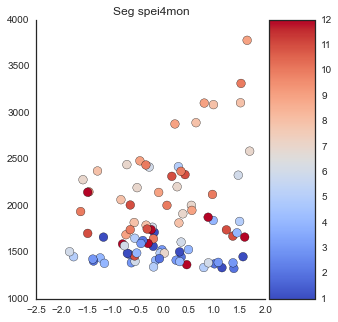

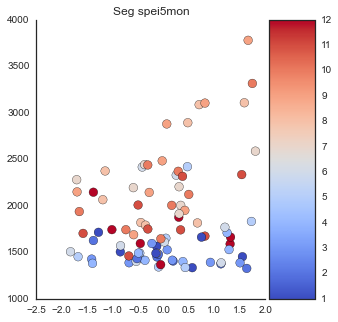

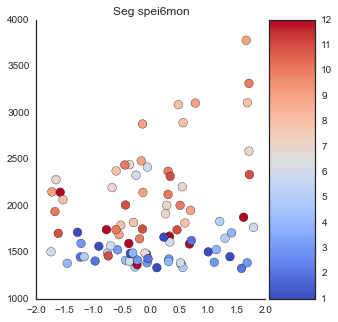

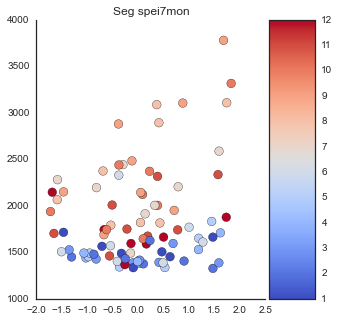

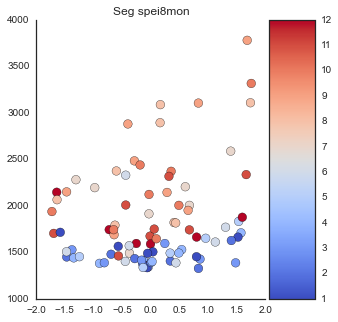

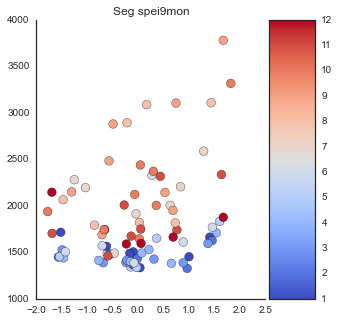

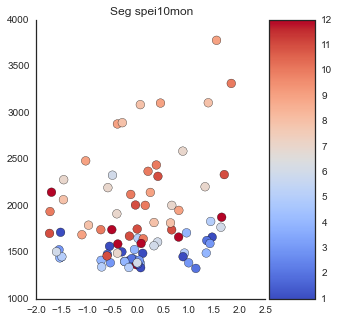

In [7]:
sites = ['Vcm','Vcp','Mpj','Wjs','Ses','Seg']
pp = PdfPages('ndvixSPEI.pdf')
idx = 0
for site in sites:
    data = pd.read_csv(wrkDir + 'monthly_spei_flux_' + site + '.csv')
    cnames = data.columns.values 
    cnames[0] = 'Time'
    data.columns = cnames
    data.index = pd.to_datetime(data['Time'])
    toAppend = MODIS_Monthly[MODIS_Monthly.Year > 2006]
    toAppend = toAppend[toAppend.Year < 2015]
    data = data[data.index.year < 2015]
    sitendvi = pd.DataFrame(dict(NDVI = toAppend[site]))
    sitendvi.index = data.index
    data['ndvi'] = sitendvi
    mons = np.arange(1,11,1)
    for mon in mons:
        spei = 'spei' + str(mon) + 'mon'
        fig, (ax) = plt.subplots(1,1, figsize=(5,5))
        divider = make_axes_locatable(ax)
        ax.scatter(data[spei].ravel(), data.ndvi.ravel(), 
                   cmap = jet, c = data.index.month, s = 75)
        sns.set_style('white')
        ax.set_title(site + ' ' + spei)
        sns.despine()
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar3 = plt.colorbar(pcx, cax=cax, ticks=MultipleLocator(1))
        plt.show()
        pp.savefig(fig)
        plt.close();
    idx = idx + 1
pp.close()


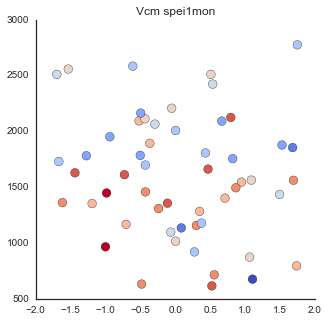

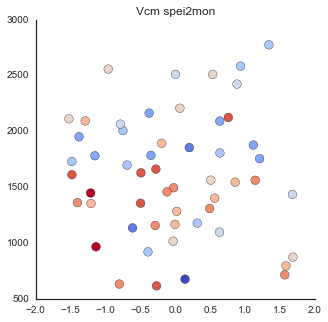

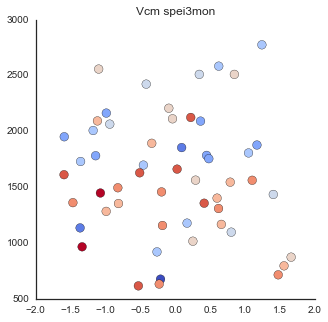

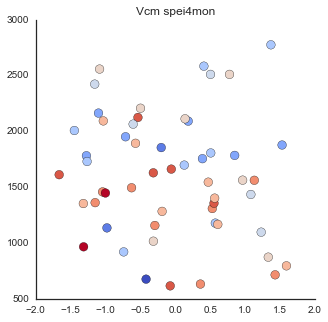

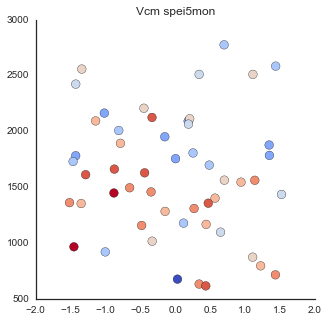

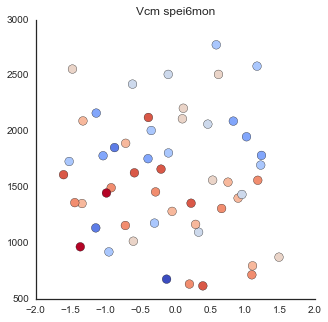

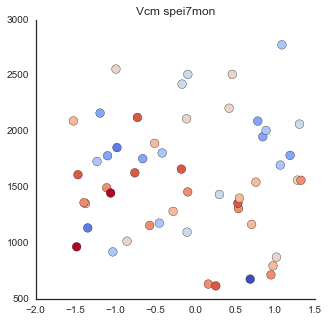

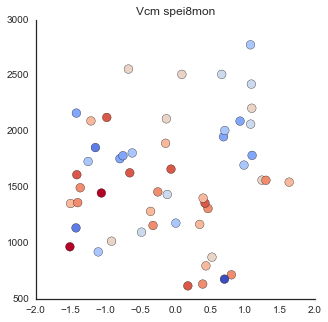

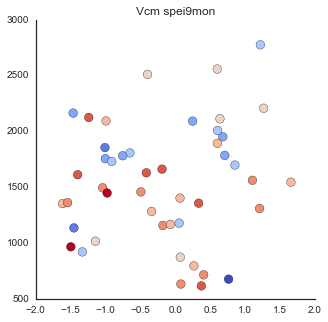

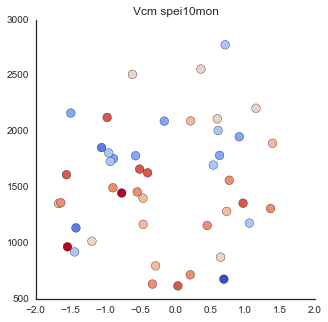

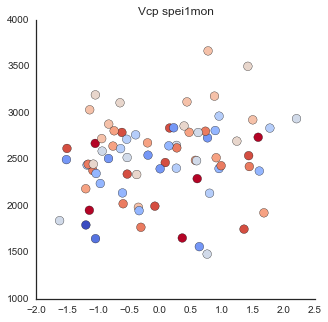

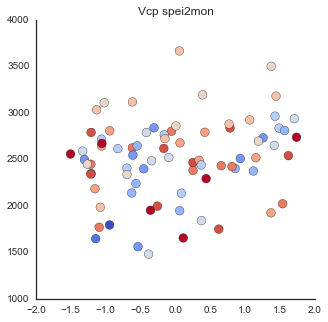

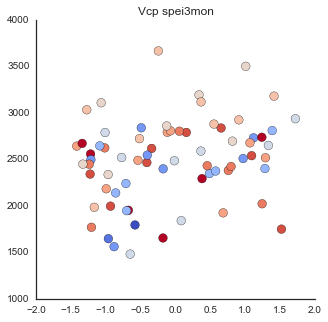

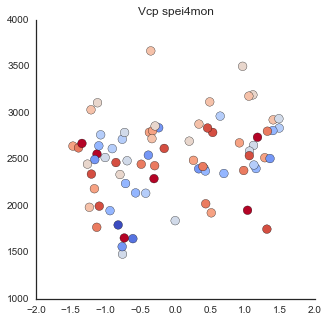

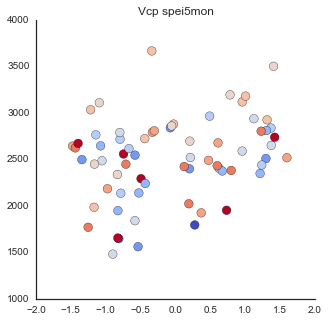

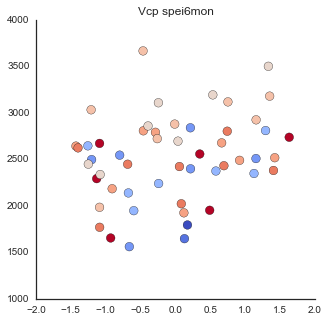

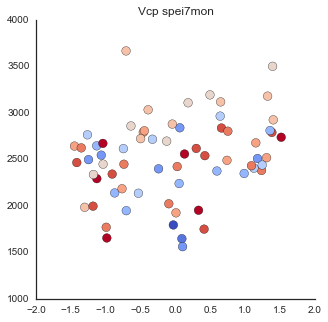

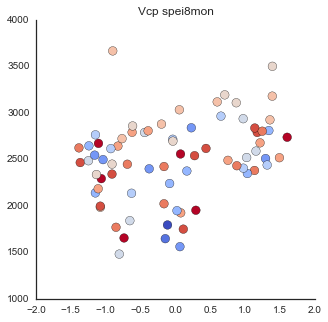

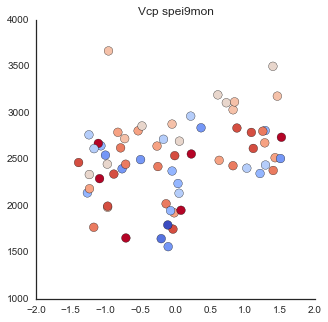

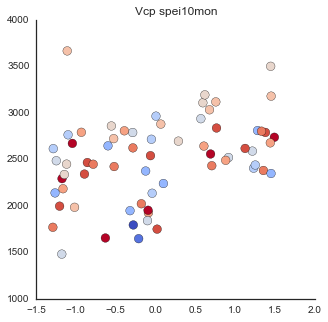

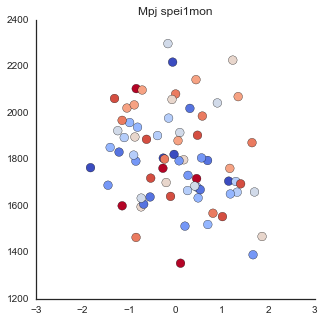

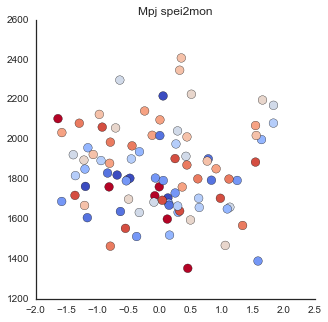

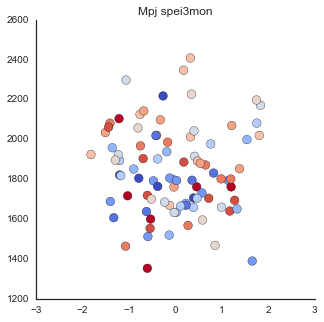

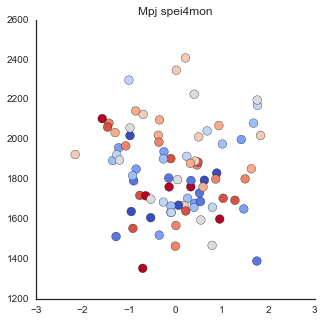

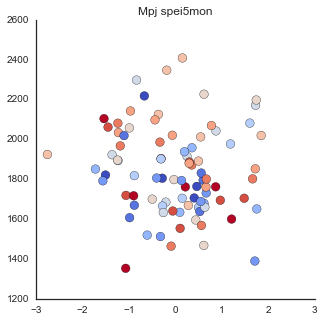

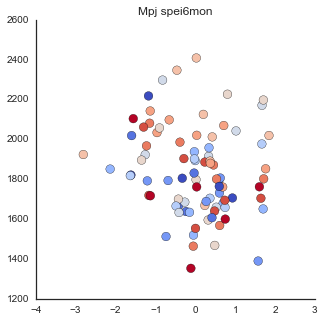

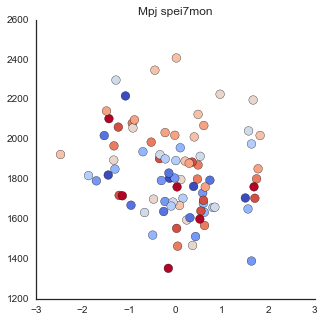

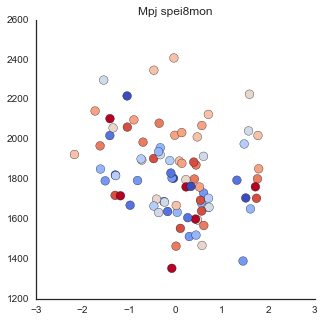

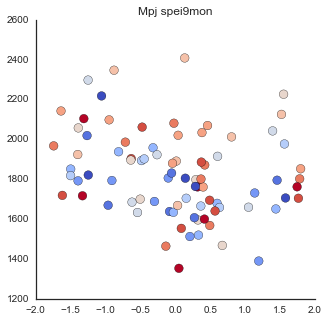

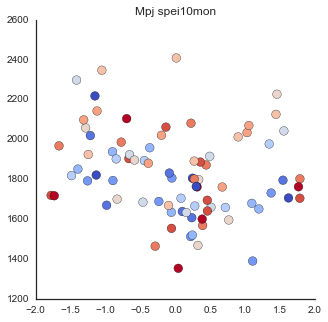

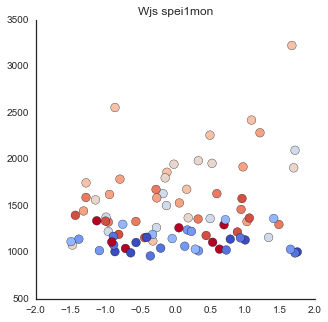

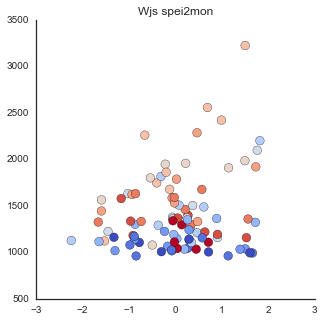

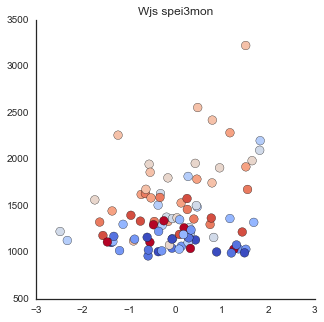

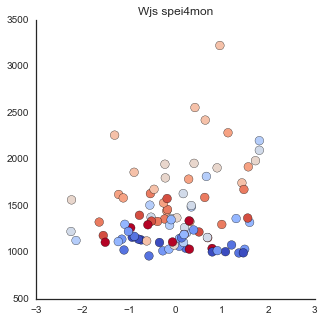

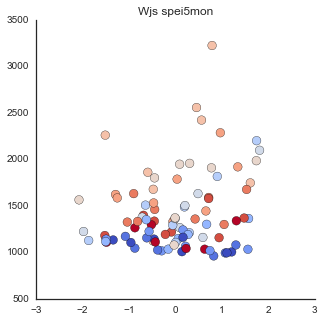

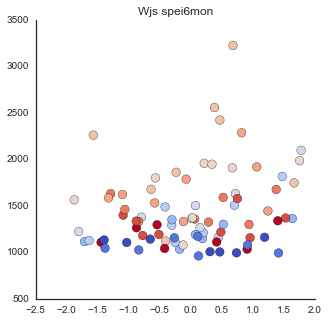

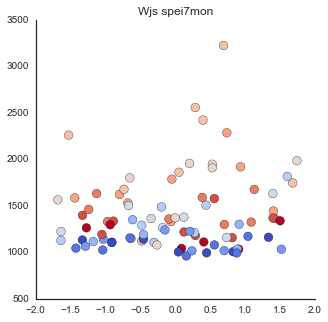

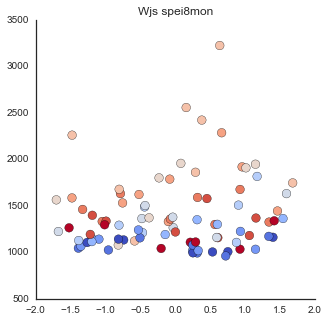

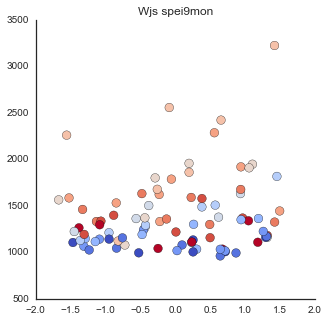

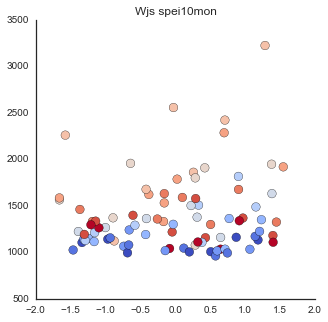

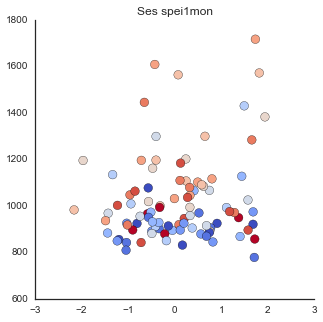

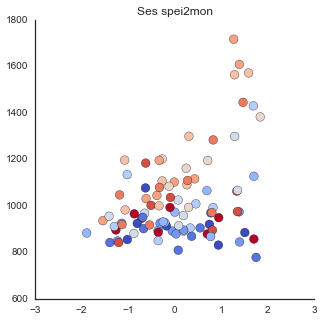

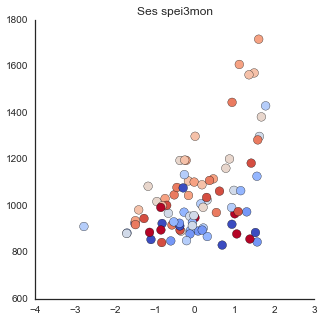

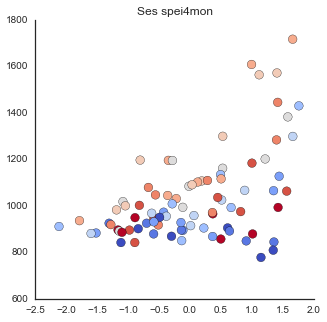

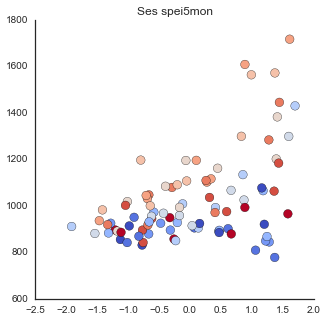

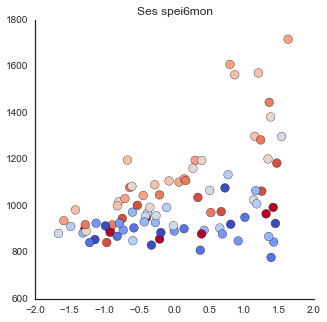

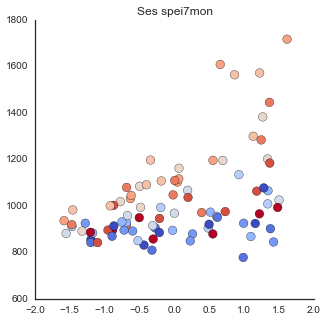

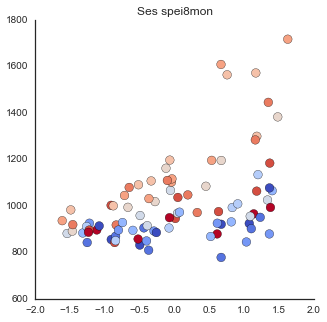

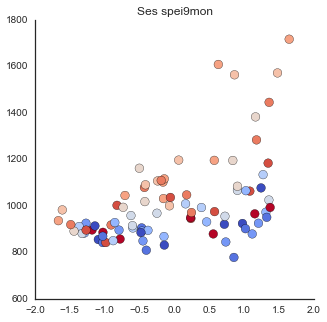

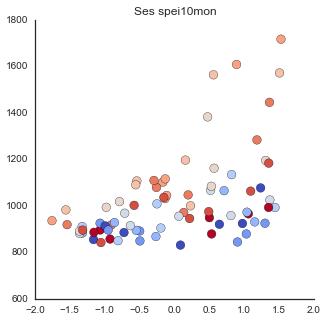

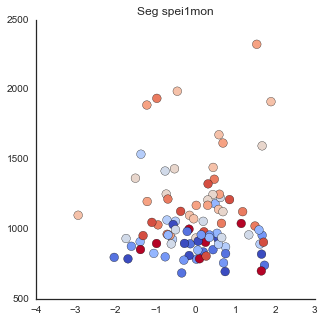

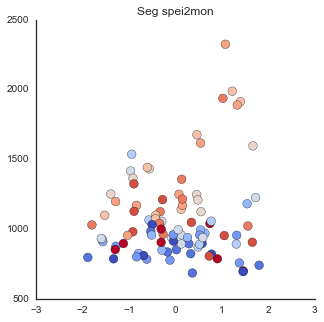

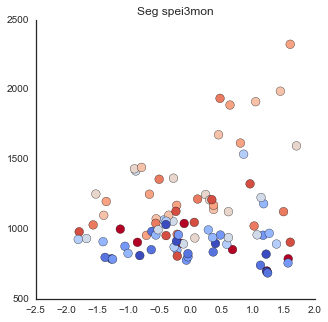

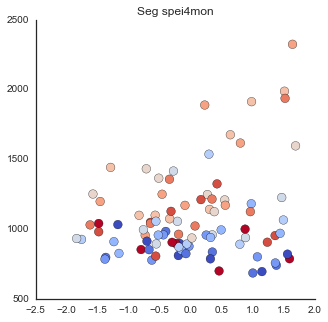

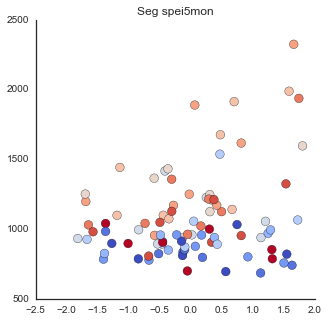

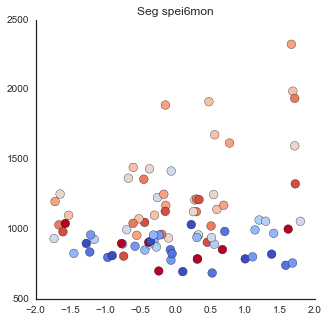

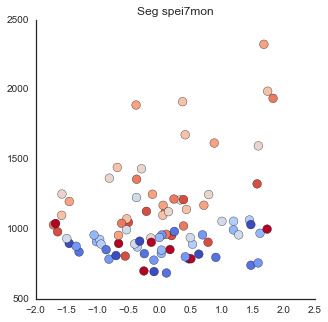

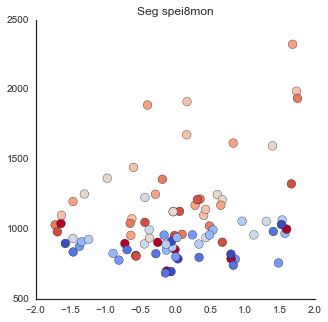

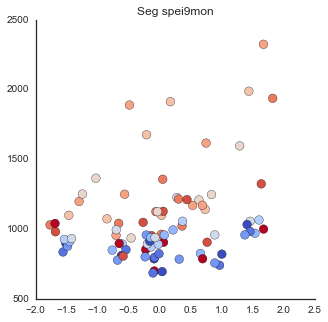

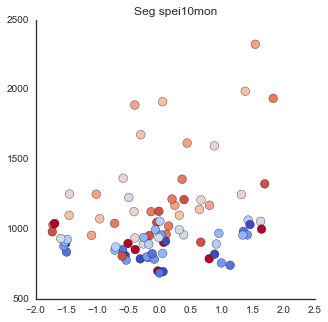

In [8]:
sites = ['Vcm','Vcp','Mpj','Wjs','Ses','Seg']
pp = PdfPages('evixSPEI.pdf')
idx = 0
for site in sites:
    data = pd.read_csv(wrkDir + 'monthly_spei_flux_' + site + '.csv')
    cnames = data.columns.values 
    cnames[0] = 'Time'
    data.columns = cnames
    data.index = pd.to_datetime(data['Time'])
    toAppend = MODISEVI_Monthly[MODISEVI_Monthly.Year > 2006]
    toAppend = toAppend[toAppend.Year < 2015]
    data = data[data.index.year < 2015]
    sitendvi = pd.DataFrame(dict(NDVI = toAppend[site]))
    sitendvi.index = data.index
    data['evi'] = sitendvi
    mons = np.arange(1,11,1)
    for mon in mons:
        spei = 'spei' + str(mon) + 'mon'
        fig, (ax) = plt.subplots(1,1, figsize=(5,5))
        ax.scatter(data[spei].ravel(), data.evi.ravel(), 
                   cmap = jet, c = data.index.month, s = 75)        
        sns.set_style('white')
        ax.set_title(site + ' ' + spei)
        sns.despine()
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar3 = plt.colorbar(pcx, cax=cax, ticks=MultipleLocator(1))
        plt.show()
        pp.savefig(fig)
        plt.close();
    idx = idx + 1
pp.close()


In [54]:
data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].evi

Time
2008-05-31    1952
2012-11-30    1612
Name: evi, dtype: float64

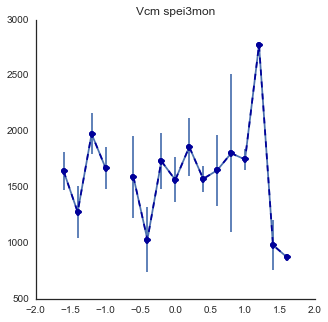

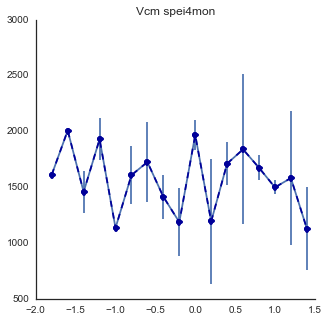

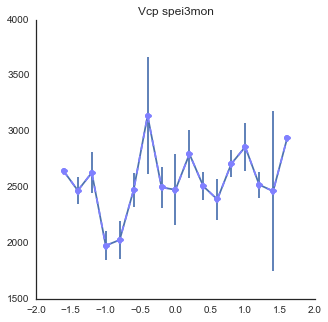

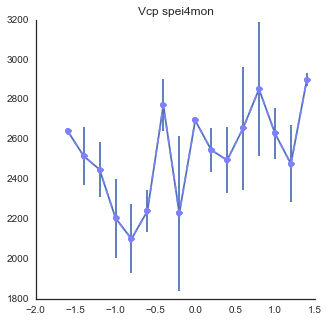

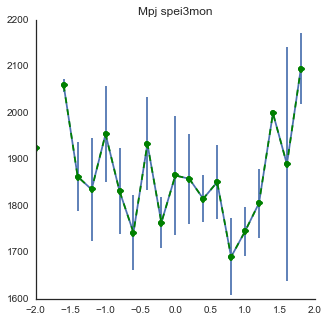

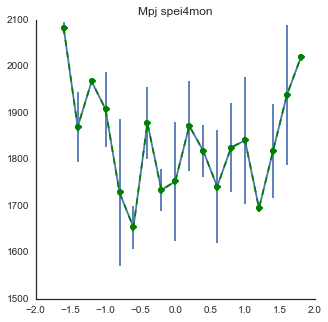

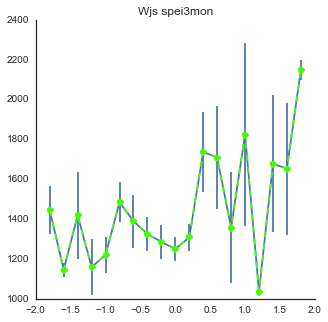

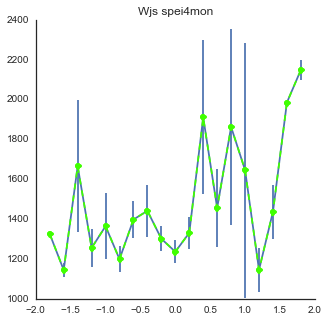

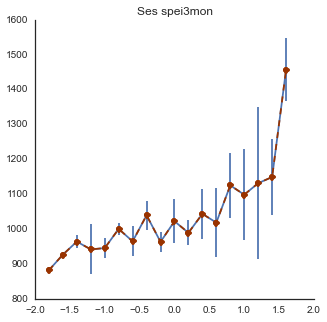

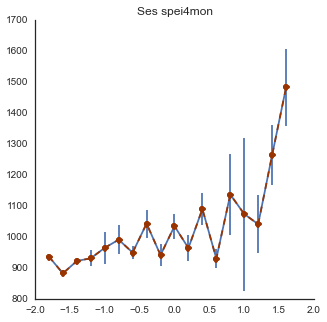

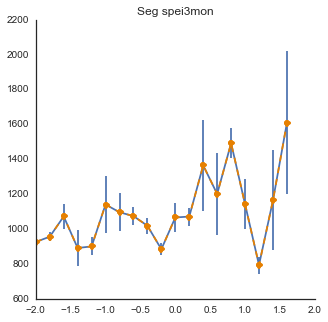

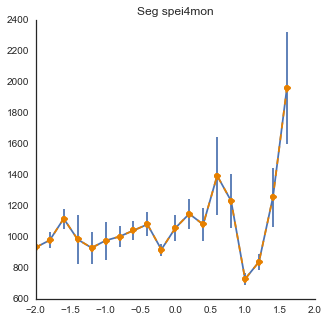

In [68]:
idx = 0
for site in sites:
    data = pd.read_csv(wrkDir + 'monthly_spei_flux_' + site + '.csv')
    cnames = data.columns.values 
    cnames[0] = 'Time'
    data.columns = cnames
    data.index = pd.to_datetime(data['Time'])
    toAppend = MODISEVI_Monthly[MODISEVI_Monthly.Year > 2006]
    toAppend = toAppend[toAppend.Year < 2015]
    data = data[data.index.year < 2015]
    sitendvi = pd.DataFrame(dict(NDVI = toAppend[site]))
    sitendvi.index = data.index
    data['evi'] = sitendvi
    mons = np.arange(3,5,1)
    for mon in mons:
        spei = 'spei' + str(mon) + 'mon'
        bin_min = -2
        bin_max = 2
        bin_size = 0.2
        yy = []
        err = []
        count = []
        fig, (ax) = plt.subplots(1,1, figsize=(5,5))
        bins = np.arange(bin_min,bin_max,bin_size)
        for binx in bins:
            yy.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].evi.mean())
            err.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].evi.std())
            count.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].evi.count())
            stderr = err / np.sqrt(count)

        #print bins, yy
        ax.errorbar(bins, yy, yerr=stderr)        
        ax.plot(bins, yy, '--o', color = siteColors[idx])        
        ax.set_title(site + ' ' + spei)
        sns.despine()
        #plt.close();
    idx = idx + 1


In [ ]:
idx = 0
for site in sites:
    data = pd.read_csv(wrkDir + 'monthly_spei_flux_' + site + '.csv')
    cnames = data.columns.values 
    cnames[0] = 'Time'
    data.columns = cnames
    data.index = pd.to_datetime(data['Time'])
    toAppend = MODIS_Monthly[MODIS_Monthly.Year > 2006]
    toAppend = toAppend[toAppend.Year < 2015]
    data = data[data.index.year < 2015]
    sitendvi = pd.DataFrame(dict(NDVI = toAppend[site]))
    sitendvi.index = data.index
    data['ndvi'] = sitendvi
    mons = np.arange(1,12,1)
    for mon in mons:
        spei = 'spei' + str(mon) + 'mon'
        bin_min = -2
        bin_max = 2
        bin_size = 0.2
        yy = []
        err = []
        count = []
        fig, (ax) = plt.subplots(1,1, figsize=(5,5))
        bins = np.arange(bin_min,bin_max,bin_size)
        for binx in bins:
            yy.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].ndvi.mean())
            err.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].ndvi.std())
            count.append(data[(data[spei] >= binx) & (data[spei] < binx + bin_size)].ndvi.count())
            stderr = err / np.sqrt(count)

        #print bins, yy
        ax.errorbar(bins, yy, yerr=stderr)        
        ax.plot(bins, yy, '--o', color = siteColors[idx])        
        ax.set_title(site + ' ' + spei)
        sns.despine()
        #plt.close();
    idx = idx + 1
